In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Get the data
data = pd.read_csv('house_prices_data_training_data.csv')

# Check the head
data.head()

#data.plot(kind='scatter',x='bedrooms',y='price',color='red')
#data.plot(kind='scatter',x='bathrooms',y='price',color='red')
#data.plot(kind='scatter',x='sqft_living',y='price',color='red')
#data.plot(kind='scatter',x='sqft_living15',y='price',color='red')
#data.plot(kind='scatter',x='sqft_lot',y='price',color='red')
#data.plot(kind='scatter',x='sqft_lot15',y='price',color='red')
#data.plot(kind='scatter',x='sqft_basement',y='price',color='red')
#data.plot(kind='scatter',x='sqft_above',y='price',color='red')

#data.plot(kind='scatter',x='floors',y='price',color='red')
#data.plot(kind='scatter',x='waterfront',y='price',color='red')
#data.plot(kind='scatter',x='view',y='price',color='red')
#data.plot(kind='scatter',x='condition',y='price',color='red')
#data.plot(kind='scatter',x='grade',y='price',color='red')

#plt.show()

def computeCostMulti(X, y, theta):
 
 
    m = y.shape[0] 
    J = 0
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta = theta- alpha / m * ((X.dot(theta) - y).T.dot(X))
        J_history[i] = computeCostMulti(X, y, theta)

    return theta, J_history

def plotData(x, y):
    fig = pyplot.figure() 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
   # pyplot.ylabel('Profit in $10,000')
   # pyplot.xlabel('Population of City in 10,000s')

def  featureNormalize(X):
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma
   

       bedrooms  bathrooms    floors  condition     grade  sqft_living15
16310  1.767954   1.894051  1.116998  -0.657102  1.075684       1.412541
5117   0.386912   3.206500  1.116998  -0.657102  2.201418       2.426174
12987 -0.450769  -1.387071 -0.847732  -0.657102 -0.527759      -1.210981
1806  -0.450769  -0.074622 -0.847732   0.737247  1.075684       0.205124
4938   0.386912   0.581602  1.116998  -0.657102  1.075684       0.547971
...         ...        ...       ...        ...       ...            ...
2984  -0.450769   0.909715  2.099362   0.737247  1.075684       0.130593
16523 -0.450769  -0.402734 -0.847732  -0.657102  0.174267      -0.078097
11243 -0.450769   1.894051  1.116998  -0.657102  0.174267      -0.346411
15572 -0.450769   0.581602  1.116998  -0.657102 -0.527759      -0.435850
15949 -0.880930  -1.387071 -0.847732  -0.657102 -1.055317      -0.674351

[10799 rows x 6 columns]
bedrooms           46.910269
bathrooms           2.056857
floors              1.431475
condition  

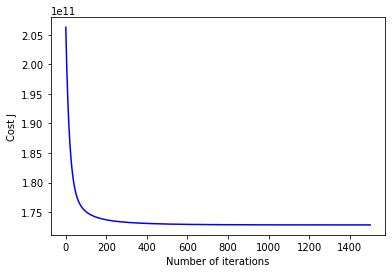

In [172]:
# For Hypothesis 1: waterfront, view, sqft_above,sqft_living,sqft_lot
#                   sqft_lot15, sqft_basement are neglected as they do not differ that much 
#We will reach x^3, which will be the value of sqft_living15 and grade

Xhyp1=data.drop(['id', 'date','price','zipcode','long','lat','yr_renovated','yr_built','waterfront','view','sqft_above','sqft_living','sqft_lot','sqft_lot15','sqft_basement'], axis=1)
Yhyp1=data['price']

Xhyp1.dropna(axis=0, how='any',inplace=True)
Yhyp1.dropna(axis=0, how='any',inplace=True)

Xhyp1['condition']=np.square(Xhyp1['condition'])
Xhyp1['grade']=np.power(Xhyp1['grade'],3)
Xhyp1['bedrooms']=np.power(Xhyp1['bedrooms'],3)
X1_train, X1_remainder, Y1_train, Y1_remainder = train_test_split(Xhyp1, Yhyp1, test_size=0.4)

X1_test,X1_validation, Y1_test, Y1_validation= train_test_split(X1_remainder, Y1_remainder, test_size=0.5)
X_norm, mu, sigma = featureNormalize(X1_train)
print(X_norm)
print(mu)
print(sigma)

theta=np.array([1000,1,4,2,5,100])
#print(theta)
J=computeCostMulti(X_norm,Y1_train,theta)
print(J)
X1_train.to_numpy()

iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentMulti(X_norm ,Y1_train, theta, alpha, iterations)
#plotData(X1_train[:,1],Y1_train)
#pyplot.plot(X1_train[:, 1], np.dot(X1_train, theta), '-')
#pyplot.legend(['Training data', 'Linear regression']);


#print(X1_train)
plt.figure()
plt.plot(range(1, iterations + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [105]:
X1_train

,bedrooms,bathrooms,floors,condition,grade,sqft_living15
10683,27.0,2.50,2.0,9.0,1000.0,3590.0
14017,8.0,1.00,1.0,9.0,343.0,1490.0
2611,27.0,1.00,1.0,16.0,343.0,1390.0
16121,64.0,2.25,1.0,16.0,512.0,2010.0
12699,27.0,1.50,1.0,16.0,343.0,1480.0
...,...,...,...,...,...,...
14526,27.0,2.75,2.0,25.0,512.0,1490.0
6182,27.0,1.75,1.0,16.0,343.0,1850.0
15684,64.0,1.75,1.0,9.0,343.0,1800.0
5588,8.0,1.00,1.0,9.0,216.0,1100.0


       bedrooms  bathrooms    floors  condition     grade  sqft_living15
3914   1.818538   3.219543  1.130908  -0.672932  2.925210       2.891683
11344  0.707707  -0.414980 -0.848938   2.343669 -0.504221      -0.689590
8685  -0.403125  -0.414980 -0.848938  -0.672932  0.353137       0.287121
3839  -1.513957  -1.406213 -0.848938   0.835368 -0.504221       0.701483
12893  1.818538   1.237076  0.140985   0.835368 -0.504221      -0.541604
...         ...        ...       ...        ...       ...            ...
9731  -0.403125   0.245843 -0.848938  -0.672932 -0.504221      -0.674792
17728  0.707707  -0.745391 -0.848938   0.835368 -0.504221      -0.674792
648   -2.624789  -1.406213 -0.848938  -0.672932 -1.361578      -1.074355
8739  -0.403125  -0.084569 -0.848938   0.835368  0.353137       1.189838
4663   0.707707   1.567487  1.130908  -0.672932 -0.504221      -1.000362

[10799 rows x 6 columns]
bedrooms            3.362904
bathrooms           2.063987
floors              1.428790
condition  

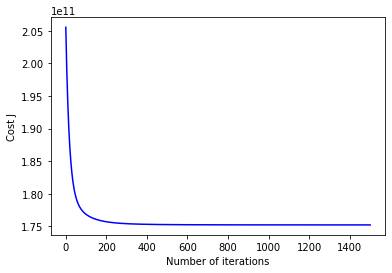

In [173]:
Xhyp2=data.drop(['id', 'date','price','zipcode','long','lat','yr_renovated','yr_built','waterfront','view','sqft_above','sqft_living','sqft_lot','sqft_lot15','sqft_basement'], axis=1)
Yhyp2=data['price']

Xhyp2.dropna(axis=0, how='any',inplace=True)
Yhyp2.dropna(axis=0, how='any',inplace=True)


X2_train, X2_test, Y2_train, Y2_test = train_test_split(Xhyp2, Yhyp2, test_size=0.4)
X_norm, mu, sigma = featureNormalize(X2_train)
print(X_norm)
print(mu)
print(sigma)

theta=np.array([0,0,0,0,0,0])
#print(theta)
J=computeCostMulti(X_norm,Y2_train,theta)
print(J)
X2_train.to_numpy()

iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentMulti(X_norm ,Y2_train, theta, alpha, iterations)

plt.figure()
plt.plot(range(1, iterations + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

       bedrooms  bathrooms    floors  condition     grade  sqft_living15
17608  0.552726   0.765758  1.027884  -0.669495  1.161457      -0.560087
4098  -0.465458   1.601914  1.027884   0.725887  2.163151       2.428150
5371  -1.192733  -1.063333 -0.799447   2.519950 -1.210975       0.522937
1699  -0.465458  -0.227177  1.027884  -0.669495 -0.525606      -0.296516
17295  0.552726   0.068962 -0.038059  -0.669495 -0.525606      -0.132134
...         ...        ...       ...        ...       ...            ...
3070   1.861820   2.072252  1.027884  -0.669495  1.161457       1.578697
16848 -0.465458  -0.488475 -0.799447   0.725887 -0.525606      -0.319016
9658  -0.465458   0.068962  1.027884  -0.669495  1.161457       0.345891
85    -0.465458  -0.714934  1.027884  -0.669495  1.161457      -0.082954
1197  -0.465458  -0.488475 -0.799447  -0.669495 -0.525606      -0.894538

[10799 rows x 6 columns]
bedrooms         1.220002e+01
bathrooms        4.815075e+00
floors           2.312483e+00
conditio

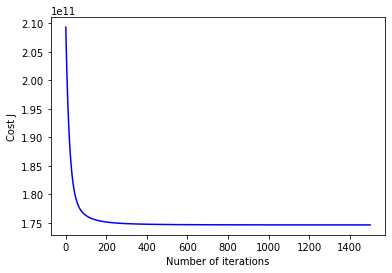

In [175]:
Xhyp3=data.drop(['id', 'date','price','zipcode','long','lat','yr_renovated','yr_built','waterfront','view','sqft_above','sqft_living','sqft_lot','sqft_lot15','sqft_basement'], axis=1)
Yhyp3=data['price']

Xhyp3.dropna(axis=0, how='any',inplace=True)
Yhyp3.dropna(axis=0, how='any',inplace=True)

Xhyp3['condition']=np.square(Xhyp3['condition'])
Xhyp3['grade']=np.power(Xhyp3['grade'],2)
Xhyp3['bedrooms']=np.power(Xhyp3['bedrooms'],2)
Xhyp3['sqft_living15']=np.square(Xhyp3['sqft_living15'])
Xhyp3['bathrooms']=np.power(Xhyp3['bathrooms'],2)
Xhyp3['floors']=np.power(Xhyp3['floors'],2)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(Xhyp3, Yhyp3, test_size=0.4)
X_norm, mu, sigma = featureNormalize(X3_train)
print(X_norm)
print(mu)
print(sigma)

theta=np.array([0,0,0,0,0,0])
#print(theta)
J=computeCostMulti(X_norm,Y3_train,theta)
print(J)
X3_train.to_numpy()

iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentMulti(X_norm ,Y3_train, theta, alpha, iterations)

plt.figure()
plt.plot(range(1, iterations + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()